# Covidify Prediction Model

 **Import Libraries and packages**

In [49]:
#Call required libraries

# Base Packages
import time                   # To time processes
import warnings               # To suppress warnings
import os                     # For os related operations
import sys
import pickle


# Installed
from statsmodels.api import datasets

import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split                    # For data size
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns

# Custom Packages


**Import the data**

In [3]:
filename = "data/tree_data_multi.csv"
aa = pd.read_csv(
    filename,
    usecols=[
        'age','sex', 'CHRONICCOUNT_', 'HEART_', 'LIVER_', 'KIDNEY_',
        'DIABETES_','LUNGS_','PROSTATE_', 'HYPERTENSION_', 'OTHER_',
        'CANCER_', 'OUTCOME_']
)

aa.head()

age      sex  CHRONICCOUNT_  OUTCOME_  HEART_  CANCER_  LIVER_  KIDNEY_  \
0  54.0     male              0         1       0        0       0        0   
1  44.0   female              0         1       0        0       0        0   
2  -1.0  unknown              0         1       0        0       0        0   
3  -1.0  unknown              0         1       0        0       0        0   
4  46.0     male              0         1       0        0       0        0   

   DIABETES_  LUNGS_  PROSTATE_  HYPERTENSION_  OTHER_  
0          0       0          0              0       0  
1          0       0          0              0       0  
2          0       0          0              0       0  
3          0       0          0              0       0  
4          0       0          0              0       0

In [7]:
print(
    aa.columns.values
)

['age' 'sex' 'CHRONICCOUNT_' 'OUTCOME_' 'HEART_' 'CANCER_' 'LIVER_'
 'KIDNEY_' 'DIABETES_' 'LUNGS_' 'PROSTATE_' 'HYPERTENSION_' 'OTHER_']


**Create Ageband and add 'Unknown" for -1**

In [8]:
#Age mean and replace -1s in age col
age_array = aa[aa["age"]!=-1]["age"]
aa["age"].replace(-1,age_array.mean(), inplace = True)

In [9]:
aa.head()

age      sex  CHRONICCOUNT_  OUTCOME_  HEART_  CANCER_  LIVER_  \
0  54.00000     male              0         1       0        0       0   
1  44.00000   female              0         1       0        0       0   
2  51.03451  unknown              0         1       0        0       0   
3  51.03451  unknown              0         1       0        0       0   
4  46.00000     male              0         1       0        0       0   

   KIDNEY_  DIABETES_  LUNGS_  PROSTATE_  HYPERTENSION_  OTHER_  
0        0          0       0          0              0       0  
1        0          0       0          0              0       0  
2        0          0       0          0              0       0  
3        0          0       0          0              0       0  
4        0          0       0          0              0       0

**One Hot Encoding**

In [10]:
# One-hot encode the data using pandas get_dummies
aa = pd.get_dummies(aa)

# Display the first 5 rows o
aa.head()

age  CHRONICCOUNT_  OUTCOME_  HEART_  CANCER_  LIVER_  KIDNEY_  \
0  54.00000              0         1       0        0       0        0   
1  44.00000              0         1       0        0       0        0   
2  51.03451              0         1       0        0       0        0   
3  51.03451              0         1       0        0       0        0   
4  46.00000              0         1       0        0       0        0   

   DIABETES_  LUNGS_  PROSTATE_  HYPERTENSION_  OTHER_  sex_female  sex_male  \
0          0       0          0              0       0           0         1   
1          0       0          0              0       0           1         0   
2          0       0          0              0       0           0         0   
3          0       0          0              0       0           0         0   
4          0       0          0              0       0           0         1   

   sex_unknown  
0            0  
1            0  
2            1  
3            1  
4            0

**Create Features and Labels**

In [2]:
# Use numpy to convert to arrays

# Labels are the values we want to predict
labels = np.array(aa['OUTCOME_'])

# Remove the labels from the features
# axis 1 refers to the columns
features= aa.drop(['OUTCOME_'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features_ = np.array(features)

feature_list

NameError: name 'aa' is not defined

**Split data into training and test**

In [16]:
# Using Skicit-learn to split data into training and testing sets


# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_, labels, test_size = 0.3, random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (718, 14)
Training Labels Shape: (718,)
Testing Features Shape: (309, 14)
Testing Labels Shape: (309,)


# Random Forest - Classification

In [18]:
RSEED = 42
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
# Fit on training data
model.fit(train_features, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [19]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 110
Average maximum depth 14


In [20]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train_features)
train_rf_probs = model.predict_proba(train_features)[:, 1]

rf_predictions = model.predict(test_features)
rf_probs = model.predict_proba(test_features)[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


**Calculate the ROC scores**

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

Recall Baseline: 1.0 Test: 0.69 Train: 0.73
Precision Baseline: 0.56 Test: 0.87 Train: 0.97
Roc Baseline: 0.5 Test: 0.84 Train: 0.91


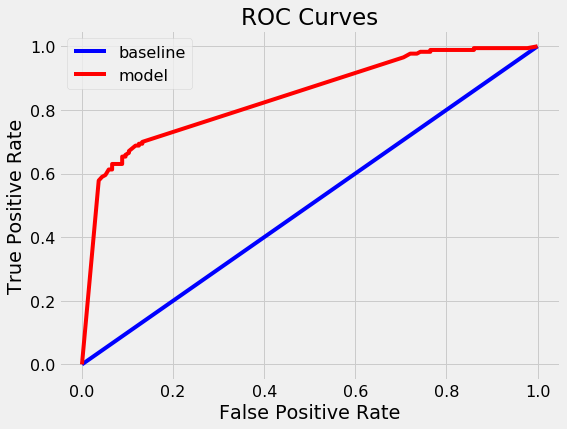

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')



**Create Confusion Matrix**

In [26]:
actual = test_labels
predicted = rf_predictions 
results = confusion_matrix(actual, predicted) 

In [40]:
#need to add labels to the confusion matrix
conf_mat = confusion_matrix(
    y_true=actual,
    y_pred=predicted
    )

TP=conf_mat[0][0]
FP=conf_mat[0][1]
FN=conf_mat[1][0]
TN=conf_mat[1][1]

In [41]:
experiment_list = [1]
tp_list = [
    TP
]
fp_list = [
    FP
]

fn_list = [
    FN
]

tn_list = [
    TN
]

df = pd.DataFrame()
df['Experiment'] = experiment_list
df['TP'] = tp_list
df['TN'] = tn_list
df['FP'] = fp_list
df['FN'] = fn_list

df

Experiment   TP   TN  FP  FN
0           1  118  120  18  53

**Feature Importance**

In [42]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.71
Variable: HYPERTENSION_        Importance: 0.08
Variable: CHRONICCOUNT_        Importance: 0.07
Variable: sex_unknown          Importance: 0.04
Variable: DIABETES_            Importance: 0.03
Variable: HEART_               Importance: 0.01
Variable: KIDNEY_              Importance: 0.01
Variable: LUNGS_               Importance: 0.01
Variable: OTHER_               Importance: 0.01
Variable: sex_female           Importance: 0.01
Variable: sex_male             Importance: 0.01
Variable: CANCER_              Importance: 0.0
Variable: LIVER_               Importance: 0.0
Variable: PROSTATE_            Importance: 0.0


**Graph of Feature Importance**

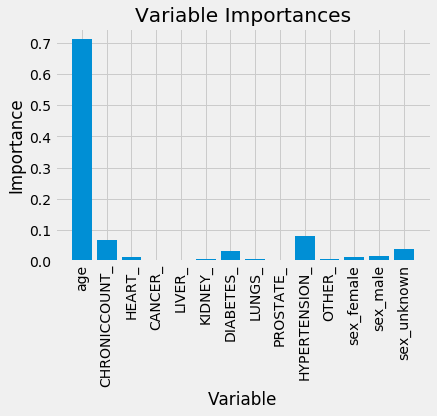

In [43]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**View the tree**

In [47]:
# !pip3.7 install pydot
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

# Save model

In [50]:
# save the model to disk

filename = 'model_artifacts/model_1.pickle'
with open(filename,'wb') as buffer:
    pickle.dump(
        model,
        buffer
    )
    buffer.close() 